
-----

# 📘 ML Project - Week 3: Model Creation, Evaluation & Tuning
-----

## 1\. Setup & Data Preparation
**Q1:** Import the necessary libraries.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler , RobustScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import pickle

sns.set(style="whitegrid")
%matplotlib inline

**Q2:** Load the  dataset and display the first 5 rows.

In [3]:
df = pd.read_csv('cardio_cleaned_week2.csv')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,MAP,bmi_cat
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50.4,21.97,90.000000,2
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55.4,34.93,106.666667,4
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51.6,23.51,90.000000,2
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48.2,28.71,116.666667,3
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47.8,23.01,73.333333,2


**Q3:** Separate the dataset into Features (`X`) and Target (`y`).

In [4]:
X = df.drop(['cardio','age','bmi_cat', 'id'], axis=1)
y = df['cardio']

-----

## 2\. Train-Test Split (Step 1)
**Q4:** Split the dataset into Training(80%) and Testing (20%) .

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Shape: {X_train.shape}")
print(f"Testing Shape:  {X_test.shape}")

Training Shape: (54912, 13)
Testing Shape:  (13729, 13)


-----

## 3\. Normalization / Scaling (Step 2)

**Q6:** Scale the data:

In [6]:
scaler = StandardScaler()
# scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data Scaled Successfully.")

Data Scaled Successfully.


-----

## 4\. Model Training 
**Q8:** Initialize the **Model**.

In [7]:
model1 = RandomForestClassifier(
    n_estimators=300,     
    max_depth=12,          
    min_samples_split=15, 
    min_samples_leaf=5,   
    max_features='log2',  
    bootstrap=True,
    class_weight='balanced', 
    random_state=42,
    n_jobs=-1
)

In [8]:
model2 = GradientBoostingClassifier(
    n_estimators=300,        
    learning_rate=0.05,      
    max_depth=4,             
    min_samples_split=20,    
    min_samples_leaf=15,     
    subsample=0.8,           
    max_features='sqrt',     
    validation_fraction=0.1, 
    n_iter_no_change=10,     
    random_state=42
)

In [9]:

ratio = float(np.sum(y_train == 0)) / np.sum(y_train == 1)

model3 = XGBClassifier(
    n_estimators=1000,
    learning_rate=0.01,
    max_depth=6,
    min_child_weight=1,
    gamma=0.2,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=ratio,
    objective='binary:logistic',
    eval_metric='auc', 
    random_state=42,
    n_jobs=-1,
    enable_categorical=True
)

model4 = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced', C=0.1, solver='liblinear')
model5 = LinearSVC(random_state=42, dual=False, class_weight='balanced', C=0.01)
model6 = KNeighborsClassifier(n_neighbors=13, weights='distance', metric='manhattan')
model7 = DecisionTreeClassifier(random_state=42, class_weight='balanced', criterion='entropy', max_depth=10, min_samples_leaf=50)
model8 = GaussianNB(var_smoothing=1e-09)
model9 = CalibratedClassifierCV(estimator=LinearSVC(random_state=42, dual=False, C=0.01, class_weight='balanced'), method='isotonic', cv=5)
estimators = [('rf', model1), ('gb', model2), ('xgb', model3)]
model10 = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(C=0.1, class_weight='balanced'), n_jobs=-1, passthrough=True)

**Q9:** Train (fit) the model using the **Scaled Training Data**.

In [10]:
model1.fit(X_train_scaled, y_train)
model2.fit(X_train_scaled, y_train)
model3.fit(X_train_scaled, y_train)
model4.fit(X_train_scaled, y_train)
model5.fit(X_train_scaled, y_train)
model6.fit(X_train_scaled, y_train)
model7.fit(X_train_scaled, y_train)
model8.fit(X_train_scaled, y_train)
model9.fit(X_train_scaled, y_train)
model10.fit(X_train_scaled, y_train)
print("All Models Trained.")

All Models Trained.


-----

## 5. Evaluation 

**Q10:** predictions on the **Scaled Test Set** (`X_test_scaled`).

In [11]:
y_pred1 = model1.predict(X_test_scaled)
y_pred2 = model2.predict(X_test_scaled)
y_pred3 = model3.predict(X_test_scaled)
y_pred4 = model4.predict(X_test_scaled)
y_pred5 = model5.predict(X_test_scaled)
y_pred6 = model6.predict(X_test_scaled)
y_pred7 = model7.predict(X_test_scaled)
y_pred8 = model8.predict(X_test_scaled)
y_pred9 = model9.predict(X_test_scaled)
y_pred10 = model10.predict(X_test_scaled)


**Q11:** Calculate the **Accuracy Score**.

In [12]:
accuracy1 = accuracy_score(y_test, y_pred1)
print(f"RandomForestClassifier Accuracy: {accuracy1 * 100:.2f}%")
accuracy2 = accuracy_score(y_test, y_pred2)
print(f"GradientBoostingClassifier Accuracy: {accuracy2 * 100:.2f}%")
accuracy3 = accuracy_score(y_test, y_pred3)
print(f"XGBoost Accuracy: {accuracy3 * 100:.2f}%")
accuracy4 = accuracy_score(y_test, y_pred4)
print(f"Logistic Regression Accuracy: {accuracy4 * 100:.2f}%")
accuracy5 = accuracy_score(y_test, y_pred5)
print(f"Linear SVC Accuracy: {accuracy5 * 100:.2f}%")
accuracy6 = accuracy_score(y_test, y_pred6)
print(f"KNN Accuracy: {accuracy6 * 100:.2f}%")
accuracy7 = accuracy_score(y_test, y_pred7)
print(f"Decision Tree Accuracy: {accuracy7 * 100:.2f}%")
accuracy8 = accuracy_score(y_test, y_pred8)
print(f"Gaussian NB Accuracy: {accuracy8 * 100:.2f}%")
accuracy9 = accuracy_score(y_test, y_pred9)
print(f"Calibrated Classifier Accuracy: {accuracy9 * 100:.2f}%")
accuracy10 = accuracy_score(y_test, y_pred10)
print(f"Stacking Classifier Accuracy: {accuracy10 * 100:.2f}%")


RandomForestClassifier Accuracy: 73.19%
GradientBoostingClassifier Accuracy: 73.14%
XGBoost Accuracy: 73.22%
Logistic Regression Accuracy: 72.34%
Linear SVC Accuracy: 72.30%
KNN Accuracy: 70.70%
Decision Tree Accuracy: 72.60%
Gaussian NB Accuracy: 71.48%
Calibrated Classifier Accuracy: 72.44%
Stacking Classifier Accuracy: 73.13%


**Q12:** Display the **Confusion Matrix** using a Heatmap.


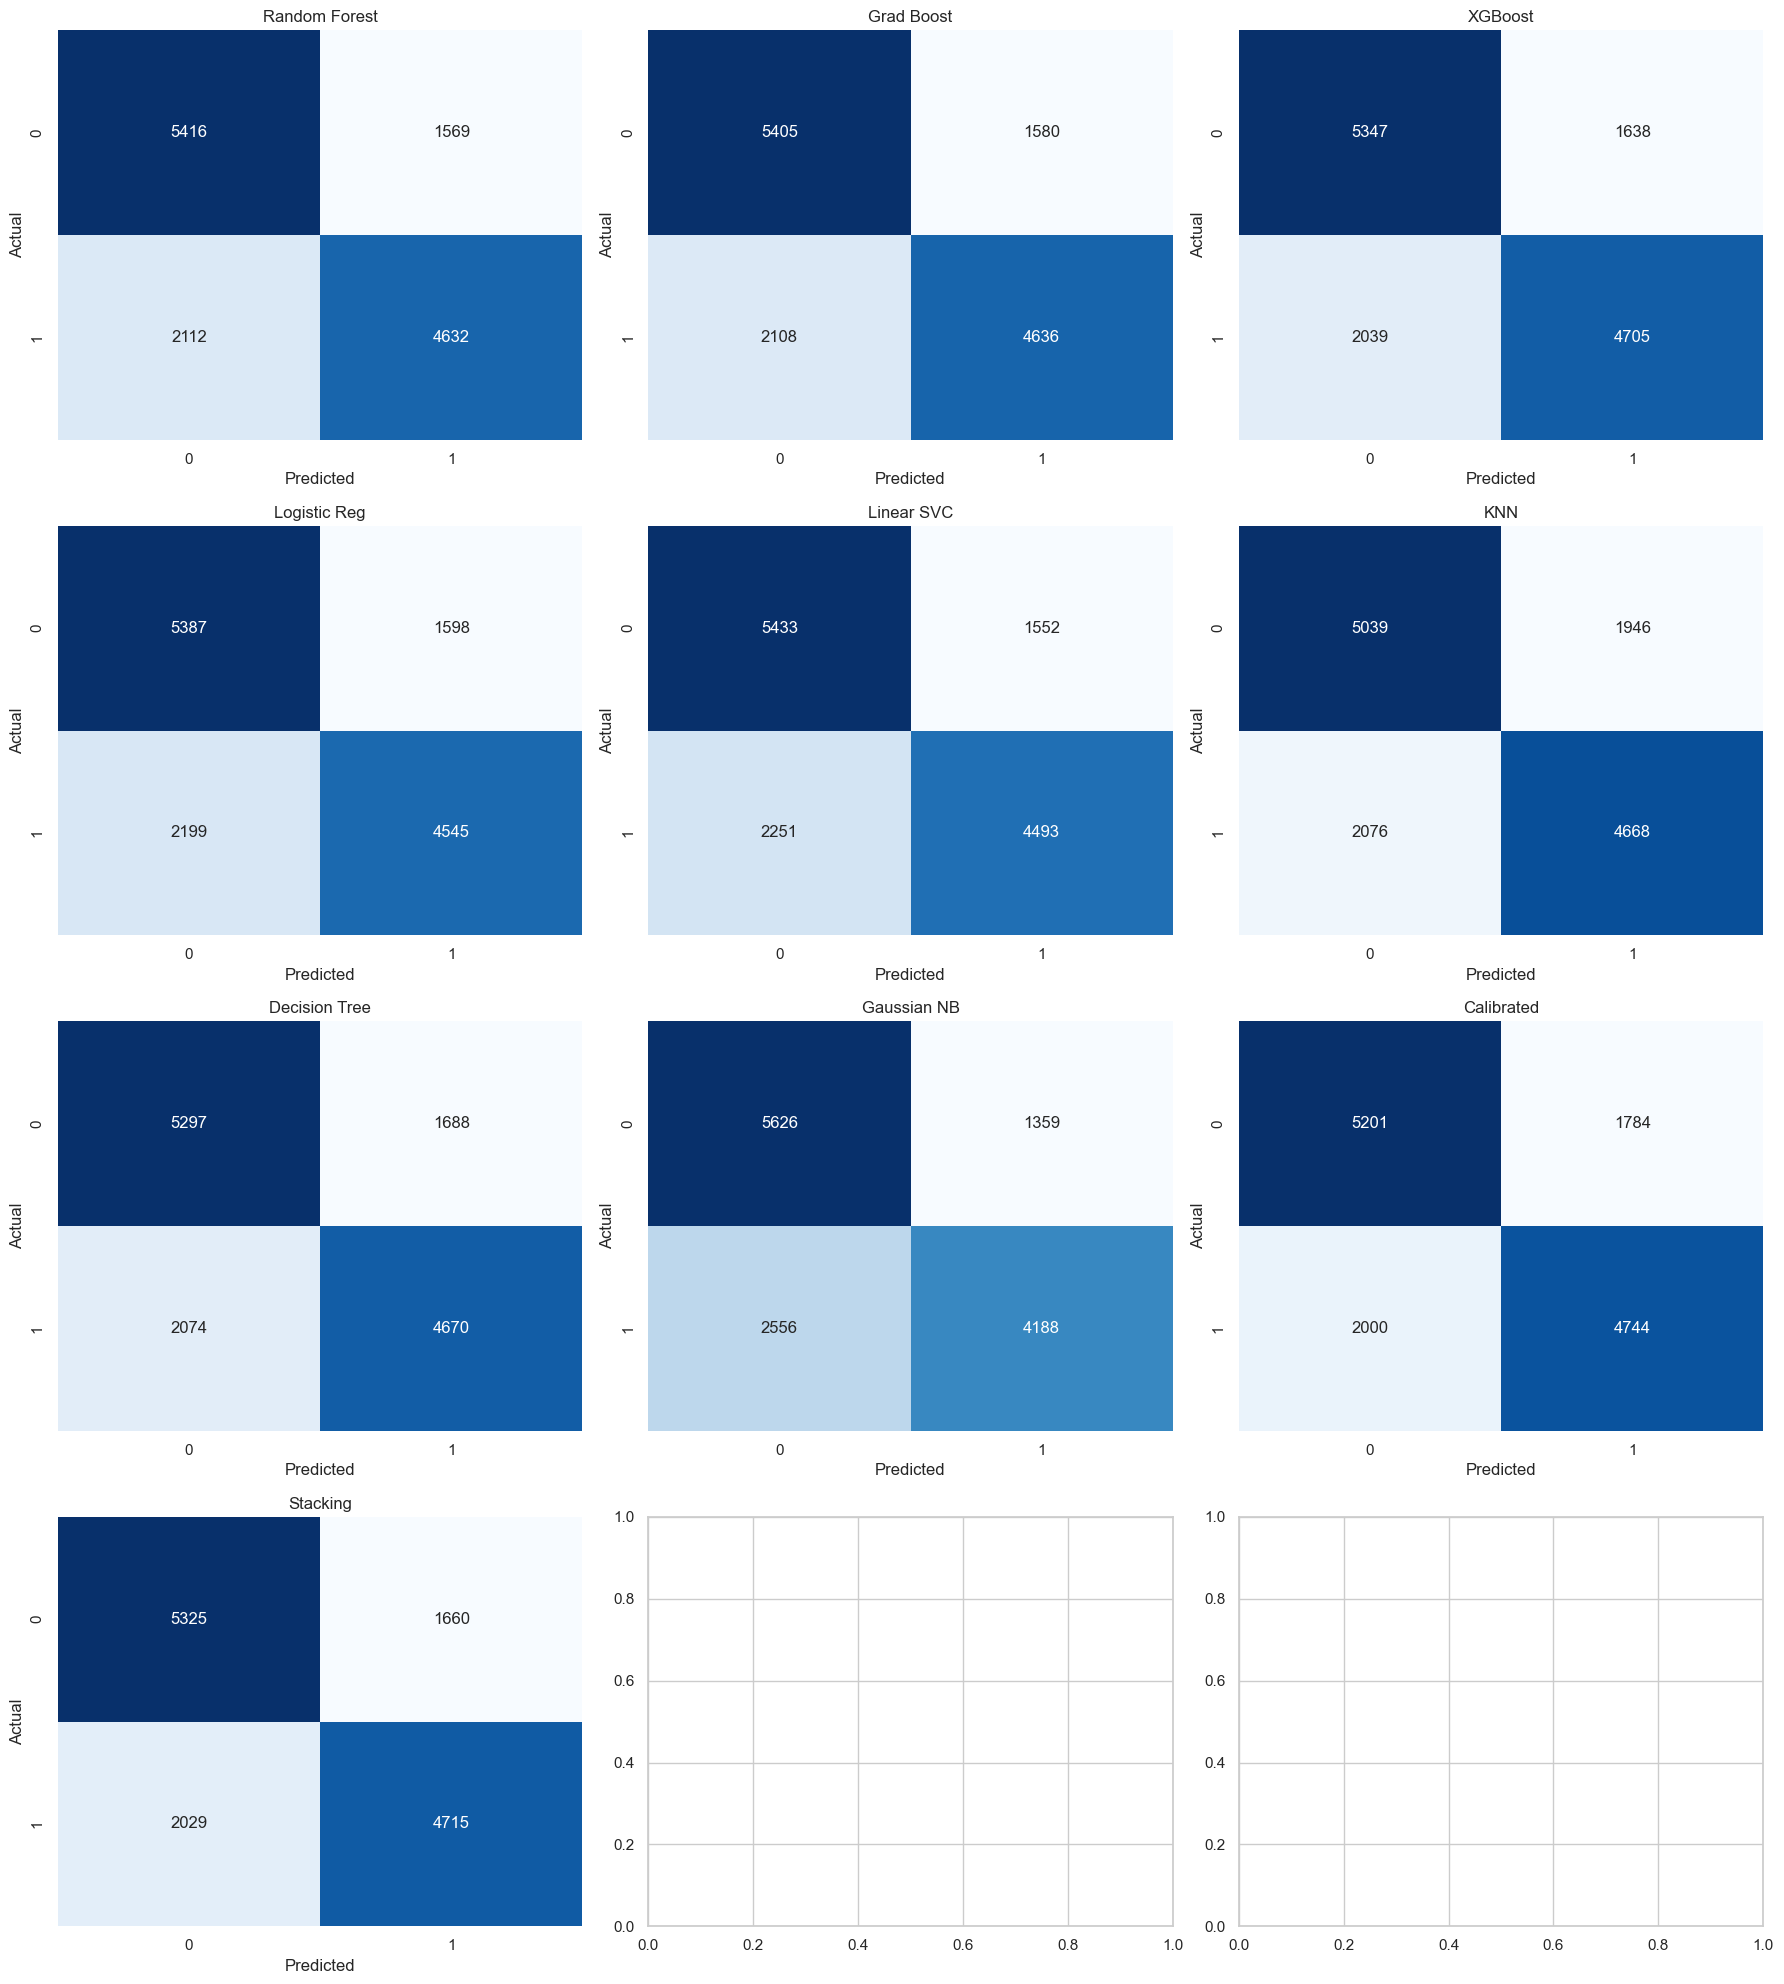

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
fig, axes = plt.subplots(4, 3, figsize=(18, 20))
axes = axes.flatten()
predictions = [y_pred1, y_pred2, y_pred3, y_pred4, y_pred5, y_pred6, y_pred7, y_pred8, y_pred9, y_pred10]
model_names = ['Random Forest', 'Grad Boost', 'XGBoost', 'Logistic Reg', 'Linear SVC', 'KNN', 'Decision Tree', 'Gaussian NB', 'Calibrated', 'Stacking']


for i, pred in enumerate(predictions):
    cm = confusion_matrix(y_test, pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[i])
    axes[i].set_title(model_names[i])
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')


plt.tight_layout()
plt.show()

**Q13:** Print the full **Classification Report** (Precision, Recall, F1-Score).

In [14]:
models = [model1, model2, model3, model4, model5, model6, model7, model8, model9, model10]
model_names = ['Random Forest', 'Gradient Boosting', 'XGBoost', 'Logistic Regression', 'Linear SVC', 'K-Nearest Neighbors', 'Decision Tree', 'Gaussian Naive Bayes', 'Calibrated Classifier', 'Stacking Classifier']
predictions = [y_pred1, y_pred2, y_pred3, y_pred4, y_pred5, y_pred6, y_pred7, y_pred8, y_pred9, y_pred10]

print("="*60)
print("FINAL MODEL COMPARISON REPORT")
print("="*60)

for name, pred in zip(model_names, predictions):
    print(f"\n--- {name} ---")
    print(classification_report(y_test, pred))

FINAL MODEL COMPARISON REPORT

--- Random Forest ---
              precision    recall  f1-score   support

           0       0.72      0.78      0.75      6985
           1       0.75      0.69      0.72      6744

    accuracy                           0.73     13729
   macro avg       0.73      0.73      0.73     13729
weighted avg       0.73      0.73      0.73     13729


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.72      0.77      0.75      6985
           1       0.75      0.69      0.72      6744

    accuracy                           0.73     13729
   macro avg       0.73      0.73      0.73     13729
weighted avg       0.73      0.73      0.73     13729


--- XGBoost ---
              precision    recall  f1-score   support

           0       0.72      0.77      0.74      6985
           1       0.74      0.70      0.72      6744

    accuracy                           0.73     13729
   macro avg       0.73      0.

-----

## 6. Overfitting & Underfitting Check 

**Q14:** check Overfitting

In [15]:
y_train_pred = model3.predict(X_train_scaled)
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_pred3)

print(f"Training Accuracy: {train_acc*100:.2f}%")
print(f"Testing Accuracy:  {test_acc*100:.2f}%")

if (train_acc - test_acc) > 0.10:
    print("Warning: Potential Overfitting detected.")
else:
    print("Good Fit: Train and Test scores are balanced.")

Training Accuracy: 75.19%
Testing Accuracy:  73.22%
Good Fit: Train and Test scores are balanced.


-----

## 7. Hyperparameter Tuning 

**Q16:**  Grid Search Setup.

In [16]:
param_grid_xgb = {
    'n_estimators': [200, 500],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 6, 9],
    'min_child_weight': [1, 5],
    'gamma': [0, 0.5]
}

xgb_model = XGBClassifier(
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='auc',
    use_label_encoder=False,
    device='cuda',
    tree_method='hist'
)

grid_search_xgb = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid_xgb,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

In [17]:
param_grid__randomForest = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

grid_search_randomForest = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid__randomForest,
                           cv=5,
                           verbose=1,
                           n_jobs=-1)

**Q17:** Run Tuning:

In [18]:
grid_search_xgb.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


D:\Anaconda\Lib\site-packages\xgboost\training.py:199: UserWarning: [19:55:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\context.cc:53: No visible GPU is found, setting device to CPU.
  bst.update(dtrain, iteration=i, fobj=obj)
D:\Anaconda\Lib\site-packages\xgboost\training.py:199: UserWarning: [19:55:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\context.cc:207: Device is changed from GPU to CPU as we couldn't find any available GPU on the system.
  bst.update(dtrain, iteration=i, fobj=obj)
D:\Anaconda\Lib\site-packages\xgboost\training.py:199: UserWarning: [19:55:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8, device='cuda',
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='auc', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=N...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'gamma': [0, 0.5], 'learning_rate': [0.05, 0.1],
                         'max_depth': [3, 6, 9], 'min_child_weight': [1, 5],
                         'n_estimators': [200, 500]},
             scoring='accuracy', verbose=1)

------------------------------
Best Parameters: {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 200}
Best CV Accuracy: 73.58%
------------------------------

Test Set Accuracy: 0.731662903343288

Classification Report:

              precision    recall  f1-score   support

           0       0.72      0.77      0.74      6985
           1       0.74      0.69      0.72      6744

    accuracy                           0.73     13729
   macro avg       0.73      0.73      0.73     13729
weighted avg       0.73      0.73      0.73     13729



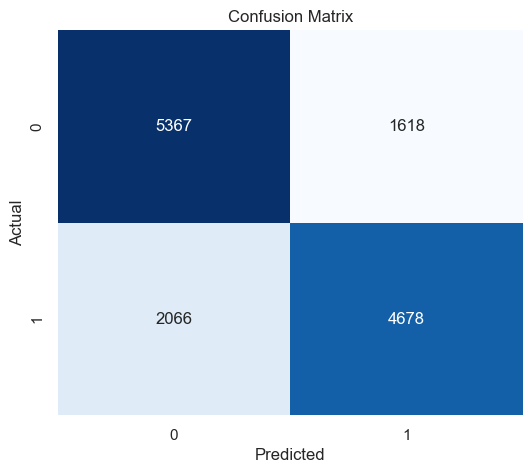

In [19]:
# grid_search_xgb.fit(X_train_scaled, y_train)

print("-" * 30)
print("Best Parameters:", grid_search_xgb.best_params_)
print(f"Best CV Accuracy: {grid_search_xgb.best_score_ * 100:.2f}%")
print("-" * 30)

best_model_xgb = grid_search_xgb.best_estimator_
y_pred = best_model_xgb.predict(X_test_scaled)

print("\nTest Set Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()






In [22]:
grid_search_randomForest.fit(X_train_scaled, y_train)

print("Best Parameters:", grid_search_randomForest.best_params_)
print(f"Best CV Accuracy: {grid_search_randomForest.best_score_ * 100:.2f}%")

best_model_randomForest = grid_search_randomForest.best_estimator_

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best CV Accuracy: 73.50%


-----

## 8\. Final Model Export

**Q20:** Save the best model .

In [21]:
data_to_save_xgb = {
    "model": best_model_xgb,
    "scaler": scaler
}
with open('best_xgboost_cvd_model.pkl', 'wb') as file:
    pickle.dump(data_to_save_xgb, file)

print("Model and Scaler saved to 'best_xgboost_cvd_model.pkl'")

Model and Scaler saved to 'best_xgboost_cvd_model.pkl'


In [23]:
data_to_save_randomForest = {
    "model": best_model_randomForest,
    "scaler": scaler
}
with open('cardio_model_week3.pkl', 'wb') as file:
    pickle.dump(data_to_save_randomForest, file)

print("Model and Scaler saved to 'cardio_model_week3.pkl'")

Model and Scaler saved to 'cardio_model_week3.pkl'


In [24]:
input_data = {
    'age': 20228,
    'gender': 1,
    'height': 156,
    'weight': 85.0,
    'ap_hi': 140,
    'ap_lo': 90,
    'cholesterol': 3,
    'gluc': 1,
    'smoke': 0,
    'alco': 0,
    'active': 1
}

input_data['age_years'] = input_data['age'] / 365.25
input_data['bmi'] = input_data['weight'] / ((input_data['height'] / 100) ** 2)
input_data['MAP'] = input_data['ap_lo'] + (input_data['ap_hi'] - input_data['ap_lo']) / 3

columns = ['gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'age_years', 'bmi', 'MAP']
df_single = pd.DataFrame([input_data], columns=columns)

# Scale data
X_single_scaled = scaler.transform(df_single)

# Predict using model3 (XGBoost)
print("Input Data:")
print(df_single.iloc[0])

prediction = model3.predict(X_single_scaled)[0]
probability = model3.predict_proba(X_single_scaled)[0][1]

print("\nPrediction (0: No Cardio Disease, 1: Cardio Disease):", prediction)
print(f"Probability of Cardio Disease: {probability:.2f}")

Input Data:
gender           1.000000
height         156.000000
weight          85.000000
ap_hi          140.000000
ap_lo           90.000000
cholesterol      3.000000
gluc             1.000000
smoke            0.000000
alco             0.000000
active           1.000000
age_years       55.381246
bmi             34.927679
MAP            106.666667
Name: 0, dtype: float64

Prediction (0: No Cardio Disease, 1: Cardio Disease): 1
Probability of Cardio Disease: 0.85
